## Understanding the data

In [ ]:
import pandas as pd
from termcolor import cprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import gensim
from gensim.utils import simple_preprocess
import spacy
import sklearn.metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score

## Checking the overall structure of data

In [ ]:
df = pd.read_csv('Tweets.csv')
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.info

<bound method DataFrame.info of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereas

In [ ]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df.shape

(14640, 15)

## Checking frequency of each sentiment class


Frequency of sentiment class :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


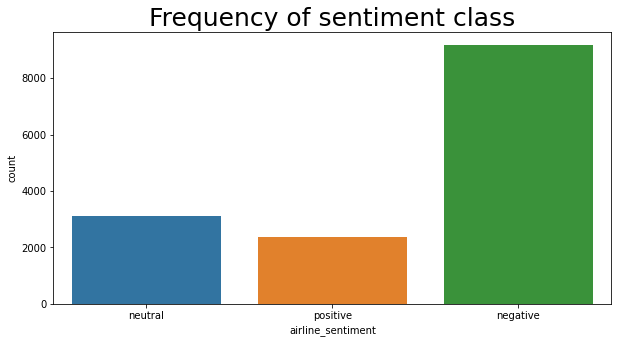

In [ ]:
cprint('Frequency of sentiment class :', 'cyan')
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (10, 5))
ax = sns.countplot(x= 'airline_sentiment', data = df)
ax.set_title(label = 'Frequency of sentiment class', fontsize = 25)
plt.show()

Text(0, 0.5, 'Number of tweets')

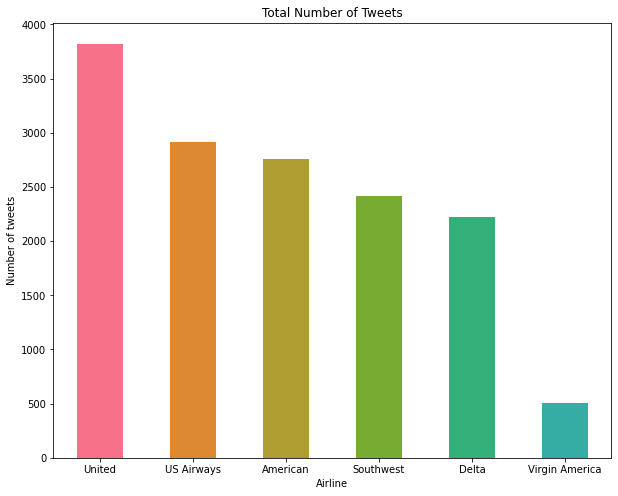

In [ ]:
colors=sns.color_palette('husl',10)
pd.Series(df['airline']).value_counts().plot(kind='bar',color=colors,figsize=(10,8), fontsize=10,rot=0,title='Total Number of Tweets')
plt.xlabel('Airline',fontsize=10)
plt.ylabel('Number of tweets',fontsize=10)



Total number of tweets per airline :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


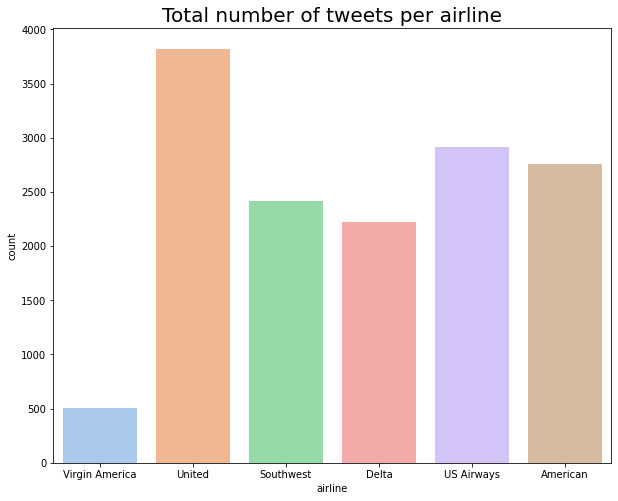

Total number of sentiments per airline :
US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [ ]:
cprint('Total number of tweets per airline :','blue')
print(df.groupby('airline')['airline_sentiment'].count())

plt.figure(figsize=(10,8))
ax = sns.countplot(x = 'airline', data=df, palette = 'pastel')
ax.set_title(label = 'Total number of tweets per airline', fontsize=20)
plt.show()

cprint('Total number of sentiments per airline :', 'red')
airlines = ['US Airways', 'United', 'American', 'Southwest', 'Delta', 'Virgin America']
for i in airlines:
  print('{} : \n'.format(i),df.loc[df.airline==i].airline_sentiment.value_counts())


Reasons of Negative Tweets :
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


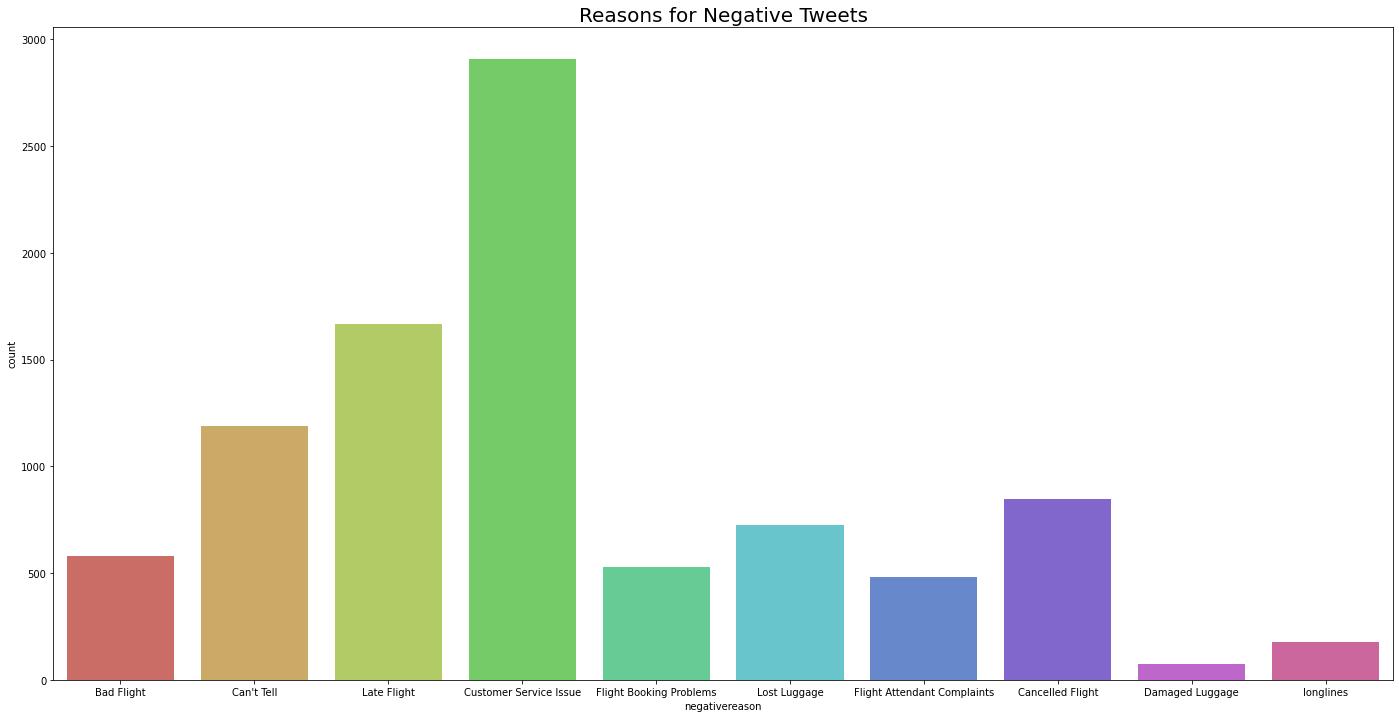

In [ ]:
cprint('Reasons of Negative Tweets :','blue')
print(df.negativereason.value_counts())

plt.figure(figsize=(24,12))
sns.countplot(x = 'negativereason', data=df, palette='hls')
plt.title('Reasons for Negative Tweets', fontsize=20)
plt.show()

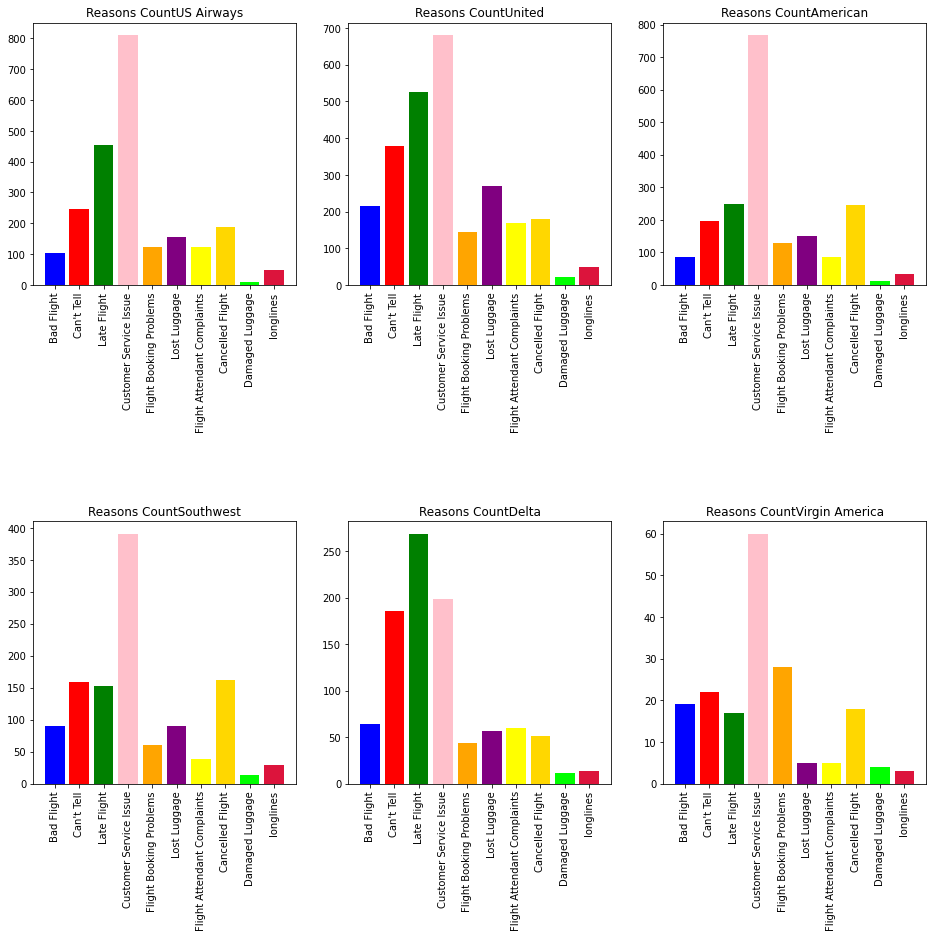

In [ ]:
NR_Count = df['negativereason'].value_counts()

def Ncount(Airline):
  airlineName = df[df['airline']==Airline]
  count =airlineName['negativereason'].value_counts()
  Unique_reason= df['negativereason'].unique()
  Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
  Reason_frame=pd.DataFrame({'Reasons': Unique_reason})
  Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
  return Reason_frame

def Plot_Reason(airline):
  a = Ncount(airline)
  count=a['count']
  Id = range(1, len(a)+1)
  plt.bar(Id, count, color=['blue', 'red', 'green', 'pink', 'orange', 'purple', 'yellow', 'gold', 'lime', 'crimson'])
  plt.xticks(Id,a['Reasons'], rotation=90)
  plt.title('Reasons Count' + airline)

plt.figure(2,figsize=(16,14))
for i in airlines:
  indices = airlines.index(i)
  plt.subplot(2,3,indices+1)
  plt.subplots_adjust(hspace=0.9)
  Plot_Reason(i)




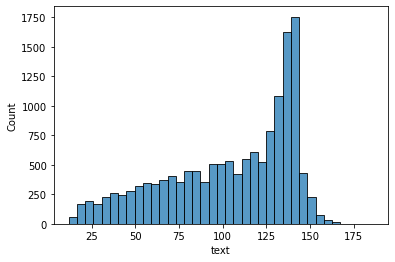

In [ ]:
sns.histplot(df.text.str.len())
plt.show()

In [ ]:
df.text.str.len().describe()


count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
Name: text, dtype: float64

## Experiment Approach

## Cleaning
## - Tokenization

In [ ]:
!pip install nltk

In [ ]:
#import libraries

import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#split words

print(df.text[0].split(),'\n')
print(df.text[1].split(),'\n')
print(df.text[100].split(),'\n')
print(df.text[1000].split(),'\n')
print(df.text[10000].split())

['@VirginAmerica', 'What', '@dhepburn', 'said.'] 

['@VirginAmerica', 'plus', "you've", 'added', 'commercials', 'to', 'the', 'experience...', 'tacky.'] 

['@VirginAmerica', 'trying', 'to', 'add', 'my', 'boy', 'Prince', 'to', 'my', 'ressie.', 'SF', 'this', 'Thursday', '@VirginAmerica', 'from', 'LAX', 'http://t.co/GsB2J3c4gM'] 

['@united', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'Seattle.', 'Flight', '1212.', 'Waiting', 'in', 'line', 'to', 'talk', 'to', 'someone', 'about', 'my', 'bag.', 'Status', 'should', 'matter.'] 

['@USAirways', 'waiting', 'all', 'day', 'at', 'ATL', 'since', 'flight', 'this', 'am', 'Cancelled', 'Flightled.', '1', 'standby', 'told', 'no', 'seats', 'and', 'group', 'of', '15', 'shows', 'up', 'Late', 'Flight', 'and', 'gets', 'on', 'to', 'PHL']


In [ ]:
#define functions for cleaning the tweets

def clean_text(token):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern,'', token)
    return text
#names relating to the airlines were extracted and added to stopwords
names = ['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
         'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
         'flight', 'airline', 'airlines']

def clean_stopword(token):
    stop_words = stopwords.words('english')
    for name in names:
        stop_words.append(name)
    return " ".join([w.lower() for w in token.split() if w.lower() not in stop_words and len(w) > 1])

def tokenize(token):
    return word_tokenize(token)



In [ ]:
df['cleaned_text']= df.text.apply(clean_text).apply(clean_stopword).apply(tokenize).to_list()
df.cleaned_text.head()

0                                     [dhepburn, said]
1    [plus, youve, added, commercials, experience, ...
2    [didnt, today, must, mean, need, take, another...
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
Name: cleaned_text, dtype: object

In [ ]:
print(" ".join(df.cleaned_text[0]),'\n')
print(" ".join(df.cleaned_text[1]),'\n')
print(" ".join(df.cleaned_text[100]),'\n')
print(" ".join(df.cleaned_text[1000]),'\n')
print(" ".join(df.cleaned_text[10000]))

dhepburn said 

plus youve added commercials experience tacky 

trying add boy prince ressie sf thursday lax httptcogsbjcgm 

put bag plane seattle waiting line talk someone bag status matter 

waiting day atl since cancelled flightled standby told seats group shows late gets phl


In [ ]:
# preprocessing before drawing wordcloud separating the sentiment.

pos = df[df['airline_sentiment'] == 'positive']
neg = df[df['airline_sentiment'] == 'negative']
neu = df[df['airline_sentiment'] == 'neutral']

positive = pos['cleaned_text']
positive = [" ".join(positive.values[i]) for i in range(len(positive))]
positive = [" ".join(positive)][0]

negative = neg['cleaned_text']
negative = [" ".join(negative.values[i]) for i in range(len(negative))]
negative = [" ".join(negative)][0]

neutral = neu['cleaned_text']
neutral = [" ".join(neutral.values[i]) for i in range(len(neutral))]
neutral = [" ".join(neutral)][0]

print(len(positive), len(negative), len(neutral))

115931 591416 151075


In [ ]:
from wordcloud import WordCloud, STOPWORDS

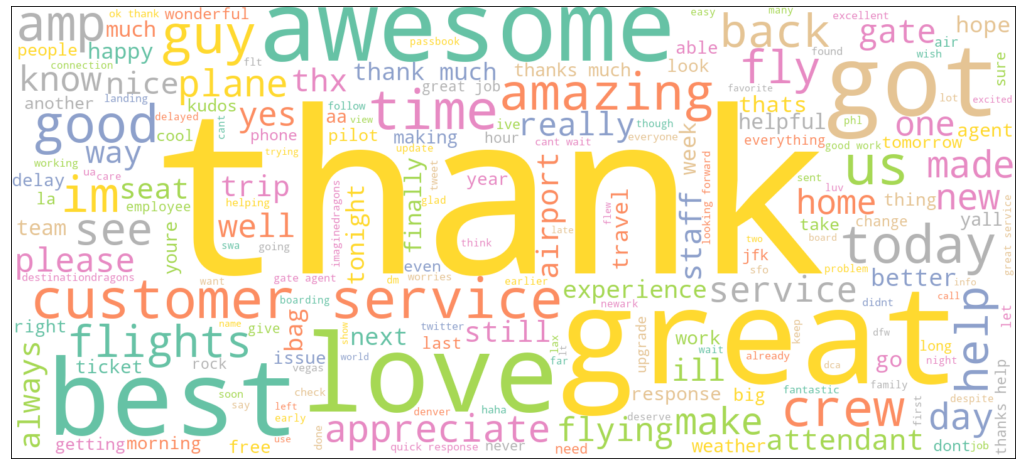

In [ ]:
plt.figure(figsize=(18,15))
wc_positive = WordCloud(min_font_size=3,max_words=200,width=1600,height=720,
                       colormap = 'Set2', background_color='white').generate(positive)

plt.imshow(wc_positive,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

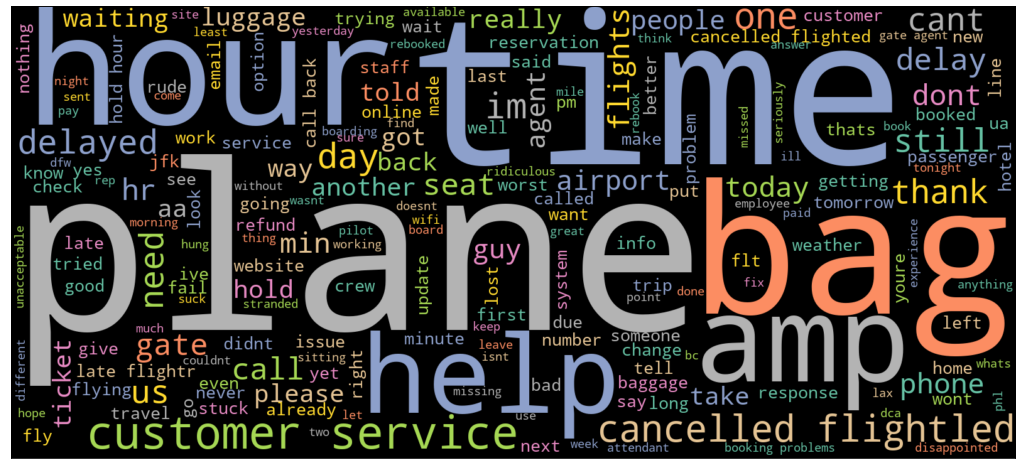

In [ ]:
plt.figure(figsize=(18,15))
wc_negative = WordCloud(min_font_size=3,max_words=200,width=1600,height=720,
                       colormap = 'Set2', background_color='black').generate(negative)

plt.imshow(wc_negative,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

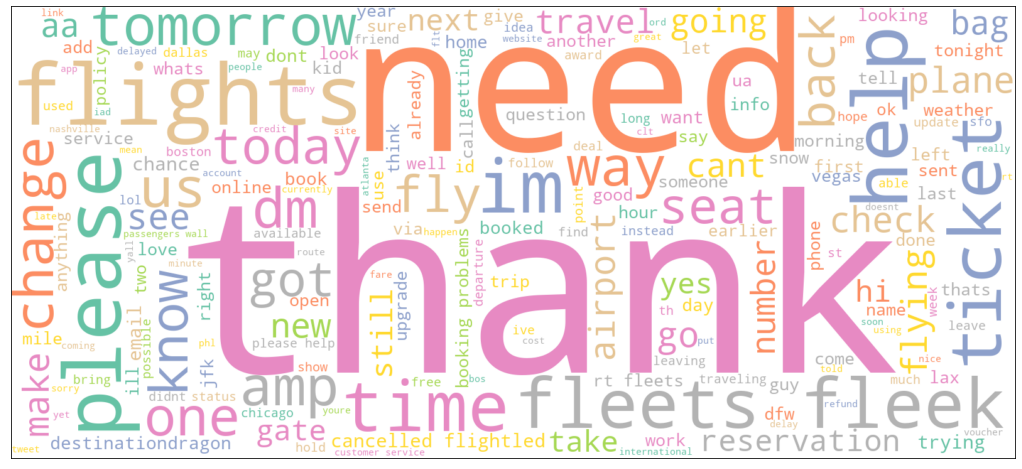

In [ ]:
plt.figure(figsize=(18,15))
wc_neutral = WordCloud(min_font_size=3,max_words=200,width=1600,height=720,
                       colormap = 'Set2', background_color='white').generate(neutral)

plt.imshow(wc_neutral,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

## Deep Learning Model - LSTM

## Steps
## Data pre-processing before feeding data into LSTM model - text data to numerical data as expected by most neural networks by using word embeddings ie (word embeddings are basically a way for us to convert words to representational vectors) using word2vec 
## 

##• Random Embedding Initialization:

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional,Embedding, Dropout, Conv1D, MaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping

In [ ]:
max_words = 5000
max_len = 100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['cleaned_text'][0],'\n')
X, tokenizer = tokenize_pad_sequences(df['cleaned_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 ['dhepburn', 'said'] 

After Tokenization & Padding 
 [125   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
y = pd.get_dummies(df.airline_sentiment)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

print('Train:         ', X_trn.shape, y_trn.shape)
print('Validation Set:', X_vld.shape, y_vld.shape)
print('Test Set:      ', X_tst.shape, y_tst.shape)

Train:          (8198, 100) (8198, 3)
Validation Set: (3514, 100) (3514, 3)
Test Set:       (2928, 100) (2928, 3)


## Standard

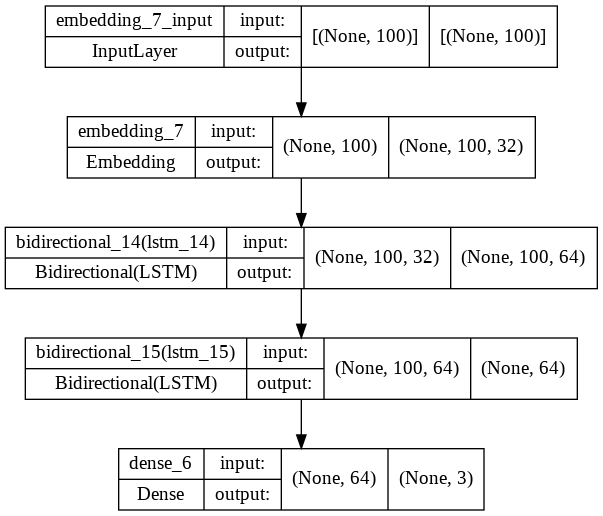

In [ ]:
#original
vocab_size = 5000
embedding_size = 32
epochs=10

model= Sequential()

model.add(Embedding(vocab_size, embedding_size, input_length=max_len))



model.add(Bidirectional(LSTM(32, return_sequences=True)))



model.add(Bidirectional(LSTM(32, return_sequences=False)))

model.add(Dense(3, activation='softmax'))

plot_model(model, show_shapes = True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 32)           160000    
                                                                 
 bidirectional_14 (Bidirecti  (None, 100, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 201,667
Trainable params: 201,667
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64
history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=10, verbose=1,
                    callbacks = [es])

Epoch 1/10
129/129 [==============================] - 41s 227ms/step - loss: 0.8101 - accuracy: 0.6615 - val_loss: 0.6557 - val_accuracy: 0.7410
Epoch 2/10
129/129 [==============================] - 26s 203ms/step - loss: 0.5630 - accuracy: 0.7692 - val_loss: 0.5844 - val_accuracy: 0.7590
Epoch 3/10
129/129 [==============================] - 26s 203ms/step - loss: 0.4251 - accuracy: 0.8428 - val_loss: 0.5715 - val_accuracy: 0.7871
Epoch 4/10
129/129 [==============================] - 27s 210ms/step - loss: 0.3213 - accuracy: 0.8842 - val_loss: 0.5866 - val_accuracy: 0.7746
Epoch 5/10
129/129 [==============================] - 27s 206ms/step - loss: 0.2533 - accuracy: 0.9125 - val_loss: 0.6789 - val_accuracy: 0.7777
Epoch 6/10
129/129 [==============================] - 27s 206ms/step - loss: 0.2089 - accuracy: 0.9322 - val_loss: 0.7399 - val_accuracy: 0.7681
Epoch 7/10
129/129 [==============================] - 27s 206ms/step - loss: 0.1764 - accuracy: 0.9427 - val_loss: 0.8356 - val_ac

In [ ]:
# Evaluate model on the test set
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))

Accuracy  : 0.7592


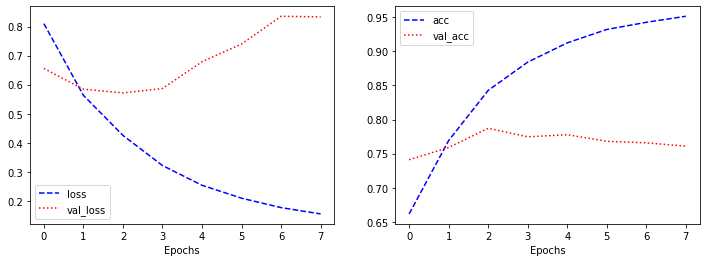

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

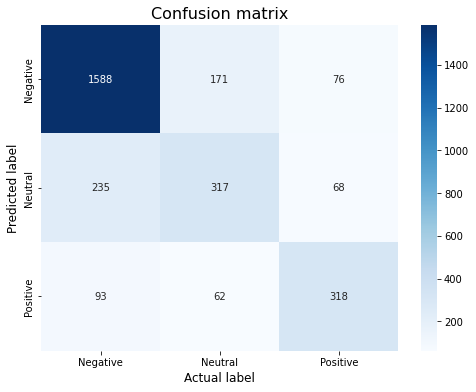

In [ ]:
#from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_tst, y_tst)

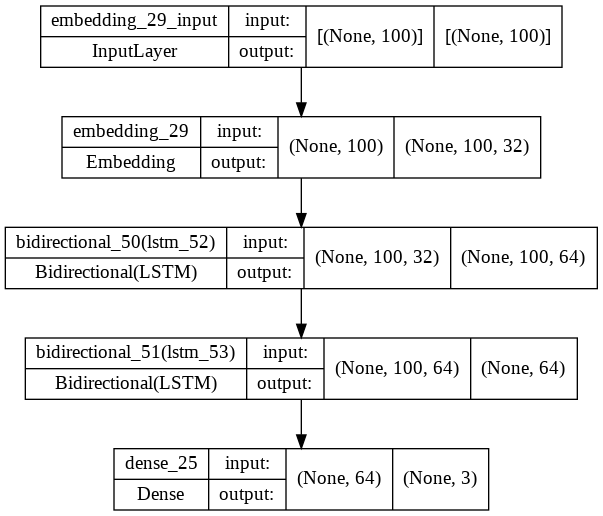

In [ ]:
#dropout
#original
vocab_size = 5000
embedding_size = 32
epochs=10

model= Sequential()

model.add(Embedding(vocab_size, embedding_size, input_length=max_len))



model.add(Bidirectional(LSTM(32, return_sequences=True,dropout=0.2)))



model.add(Bidirectional(LSTM(32, return_sequences=False)))

model.add(Dense(3, activation='softmax'))

plot_model(model, show_shapes = True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 100, 32)           160000    
                                                                 
 bidirectional_50 (Bidirecti  (None, 100, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_51 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dense_25 (Dense)            (None, 3)                 195       
                                                                 
Total params: 201,667
Trainable params: 201,667
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64
history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=10, verbose=1,
                    callbacks = [es])

Epoch 1/10
129/129 [==============================] - 38s 221ms/step - loss: 0.8275 - accuracy: 0.6539 - val_loss: 0.6386 - val_accuracy: 0.7462
Epoch 2/10
129/129 [==============================] - 27s 210ms/step - loss: 0.5841 - accuracy: 0.7603 - val_loss: 0.5853 - val_accuracy: 0.7610
Epoch 3/10
129/129 [==============================] - 27s 208ms/step - loss: 0.4518 - accuracy: 0.8297 - val_loss: 0.5577 - val_accuracy: 0.7854
Epoch 4/10
129/129 [==============================] - 27s 208ms/step - loss: 0.3572 - accuracy: 0.8705 - val_loss: 0.5884 - val_accuracy: 0.7834
Epoch 5/10
129/129 [==============================] - 27s 209ms/step - loss: 0.3101 - accuracy: 0.8879 - val_loss: 0.6093 - val_accuracy: 0.7675
Epoch 6/10
129/129 [==============================] - 27s 208ms/step - loss: 0.2603 - accuracy: 0.9094 - val_loss: 0.6646 - val_accuracy: 0.7775
Epoch 7/10
129/129 [==============================] - 27s 209ms/step - loss: 0.2104 - accuracy: 0.9271 - val_loss: 0.7486 - val_ac

In [ ]:
# Evaluate model on the test set
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))

Accuracy  : 0.7630


In [ ]:
#LSTM units increase 

vocab_size = 5000
embedding_size = 32
epochs=10
max_len=100

model= Sequential()

model.add(Embedding(vocab_size, embedding_size, input_length=max_len))



model.add(Bidirectional(LSTM(128, return_sequences=True)))



model.add(Bidirectional(LSTM(128, return_sequences=False)))

model.add(Dense(3, activation='softmax'))

plot_model(model, show_shapes = True)
#compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64
history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=10, verbose=1,
                    callbacks = [es])

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 100, 32)           160000    
                                                                 
 bidirectional_52 (Bidirecti  (None, 100, 256)         164864    
 onal)                                                           
                                                                 
 bidirectional_53 (Bidirecti  (None, 256)              394240    
 onal)                                                           
                                                                 
 dense_26 (Dense)            (None, 3)                 771       
                                                                 
Total params: 719,875
Trainable params: 719,875
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
129/129 [======================

In [ ]:
# Evaluate model on the test set
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

Accuracy  : 0.7606


## Epochs


In [ ]:
#Epochs increase 

vocab_size = 5000
embedding_size = 32
epochs=20
max_len=100

model= Sequential()

model.add(Embedding(vocab_size, embedding_size, input_length=max_len))



model.add(Bidirectional(LSTM(128, return_sequences=True)))



model.add(Bidirectional(LSTM(128, return_sequences=False)))

model.add(Dense(3, activation='softmax'))

plot_model(model, show_shapes = True)
#compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64
history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=20, verbose=1,
                    callbacks = [es])

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 100, 32)           160000    
                                                                 
 bidirectional_54 (Bidirecti  (None, 100, 256)         164864    
 onal)                                                           
                                                                 
 bidirectional_55 (Bidirecti  (None, 256)              394240    
 onal)                                                           
                                                                 
 dense_27 (Dense)            (None, 3)                 771       
                                                                 
Total params: 719,875
Trainable params: 719,875
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
129/129 [======================

In [ ]:
# Evaluate model on the test set
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

Accuracy  : 0.7647


In [ ]:
#Batch size reduced

vocab_size = 5000
embedding_size = 32
epochs=10
max_len=100

model= Sequential()

model.add(Embedding(vocab_size, embedding_size, input_length=max_len))



model.add(Bidirectional(LSTM(128, return_sequences=True)))



model.add(Bidirectional(LSTM(128, return_sequences=False)))

model.add(Dense(3, activation='softmax'))

plot_model(model, show_shapes = True)
#compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 32
history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=20, verbose=1,
                    callbacks = [es])

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_32 (Embedding)    (None, 100, 32)           160000    
                                                                 
 bidirectional_56 (Bidirecti  (None, 100, 256)         164864    
 onal)                                                           
                                                                 
 bidirectional_57 (Bidirecti  (None, 256)              394240    
 onal)                                                           
                                                                 
 dense_28 (Dense)            (None, 3)                 771       
                                                                 
Total params: 719,875
Trainable params: 719,875
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
257/257 [======================

Accuracy  : 0.7599


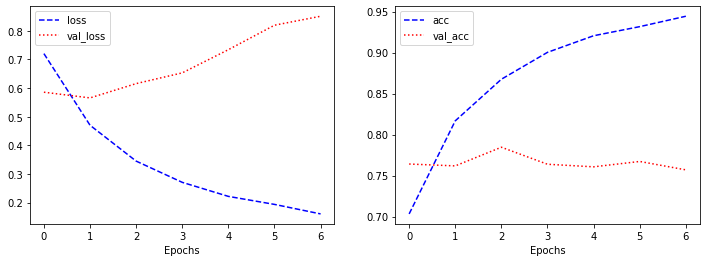

In [ ]:
# Evaluate model on the test set
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

## Embeddings Seeded with word2vec:

*   List item
*   List item



In [ ]:
# Train Word2Vec model with gensim on the dataset
X = df['cleaned_text']

model_w2v = gensim.models.Word2Vec(
            X,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34)

In [ ]:
# Retrieve the weights from the model. This is used for initializing the weights
# in a Keras Embedding layer later
w2v_weights = model_w2v.wv.vectors
vocab_size, embedding_size = w2v_weights.shape

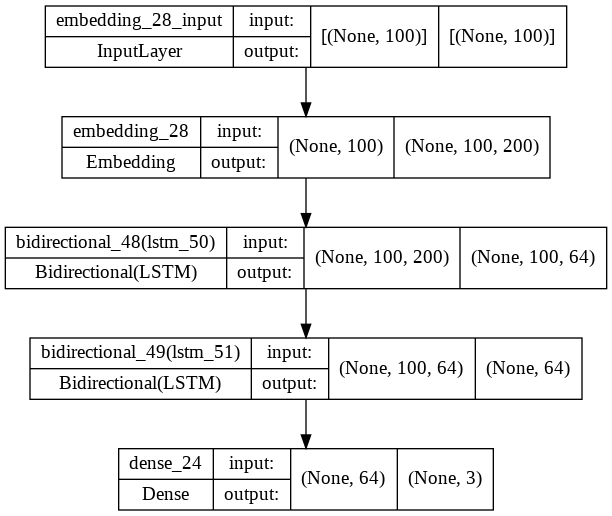

In [ ]:
#building model
max_words = 5000
max_len = 100
vocab_size = 5830
embedding_size = 200
epochs=10

model = Sequential()

# Keras Embedding layer with Word2Vec weights initialization
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    weights=[w2v_weights],
                    input_length=max_len))
#model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
#model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(32, return_sequences=False)))
model.add(Dense(3, activation='softmax'))

plot_model(model, show_shapes = True)



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 100, 200)          1166000   
                                                                 
 bidirectional_48 (Bidirecti  (None, 100, 64)          59648     
 onal)                                                           
                                                                 
 bidirectional_49 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dense_24 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,250,675
Trainable params: 1,250,675
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64

history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks = [es])

Epoch 1/10
129/129 [==============================] - 84s 292ms/step - loss: 0.7790 - accuracy: 0.6685 - val_loss: 0.5998 - val_accuracy: 0.7567
Epoch 2/10
129/129 [==============================] - 39s 305ms/step - loss: 0.5027 - accuracy: 0.8039 - val_loss: 0.5710 - val_accuracy: 0.7797
Epoch 3/10
129/129 [==============================] - 36s 278ms/step - loss: 0.3681 - accuracy: 0.8667 - val_loss: 0.5761 - val_accuracy: 0.7908
Epoch 4/10
129/129 [==============================] - 35s 275ms/step - loss: 0.2856 - accuracy: 0.9013 - val_loss: 0.6260 - val_accuracy: 0.7772
Epoch 5/10
129/129 [==============================] - 36s 277ms/step - loss: 0.2203 - accuracy: 0.9250 - val_loss: 0.7495 - val_accuracy: 0.7666
Epoch 6/10
129/129 [==============================] - 36s 278ms/step - loss: 0.1938 - accuracy: 0.9313 - val_loss: 0.7730 - val_accuracy: 0.7777
Epoch 7/10
129/129 [==============================] - 36s 278ms/step - loss: 0.1553 - accuracy: 0.9477 - val_loss: 0.8016 - val_ac

In [ ]:
# Evaluate model on the test set
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))

Accuracy  : 0.7732


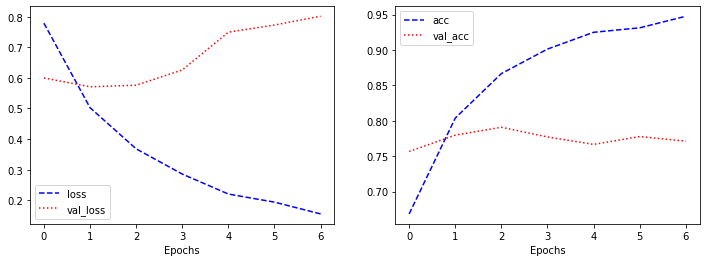

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

## Final Model

In [ ]:
##final model
#building model
max_words = 5000
max_len = 100
vocab_size = 5830
embedding_size = 200
epochs=20

model = Sequential()

# Keras Embedding layer with Word2Vec weights initialization
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    weights=[w2v_weights],
                    input_length=max_len))
#model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(32, return_sequences=True, dropout=0.2)))
#model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(32, return_sequences=False, dropout=0.2)))
model.add(Dense(3, activation='softmax'))

plot_model(model, show_shapes = True)


#compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 32
history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=10, verbose=1,
                    callbacks = [es])

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_33 (Embedding)    (None, 100, 200)          1166000   
                                                                 
 bidirectional_58 (Bidirecti  (None, 100, 64)          59648     
 onal)                                                           
                                                                 
 bidirectional_59 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dense_29 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,250,675
Trainable params: 1,250,675
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
257/257 [==================

Accuracy  : 0.7719


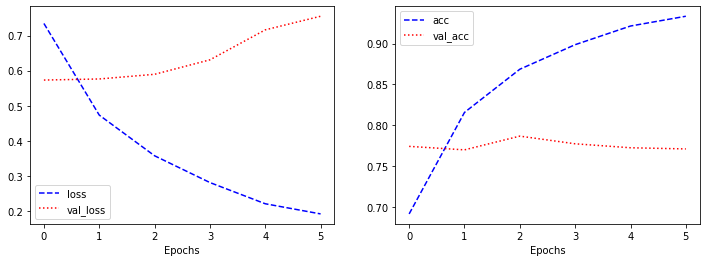

In [ ]:
# Evaluate model on the test set
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()